## Question to answer from the dataset
1. What is the most popular release year for movies and TV shows on Netflix?
2. What year did netflix add the most content to its platform?
3. Independent of year, what is the most popular month to add new content?
4. What is the movie with the longest title in the dataset?

### Step One: Import Libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 150

### Step Two: Import and Process Dataset

In [138]:
df = pd.read_csv('./netflix_titles.csv') # Import dataset
df.head() #View dataset head

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus..."


In [171]:
print('Dataset has ', df.shape[0], 'rows')
print('Dataset has ', df.shape[1], 'columns')

Dataset has  8807 rows
Dataset has  14 columns


In [139]:
df.info() # View dataset properties and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Step Three: Feature Engineering

In [140]:
# Rename columns
df = df.rename(columns={'show_id': 'Show ID',
                        'type': 'Type',
                        'title' : 'Title',
                        'director' : 'Director',
                        'cast' : 'Cast',
                        'country' : 'Country',
                        'date_added' : 'Date Added',
                        'release_year' : 'Release Year',
                        'rating': 'Rating', 
                        'duration': 'Duration',
                        'listed_in' : 'Listed In',
                        'description' : 'Description'})

In [141]:
# Transform columns to correct data type
df['Date Added'] = pd.to_datetime(df['Date Added'])
df['Month Added'] = pd.to_datetime(df['Date Added']).dt.month_name()
df['Year Added'] = pd.to_datetime(df['Date Added']).dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show ID       8807 non-null   object        
 1   Type          8807 non-null   object        
 2   Title         8807 non-null   object        
 3   Director      6173 non-null   object        
 4   Cast          7982 non-null   object        
 5   Country       7976 non-null   object        
 6   Date Added    8797 non-null   datetime64[ns]
 7   Release Year  8807 non-null   int64         
 8   Rating        8803 non-null   object        
 9   Duration      8804 non-null   object        
 10  Listed In     8807 non-null   object        
 11  Description   8807 non-null   object        
 12  Month Added   8797 non-null   object        
 13  Year Added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963.4+ KB


In [142]:
#check for null values
df.isna().sum()

Show ID            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date Added        10
Release Year       0
Rating             4
Duration           3
Listed In          0
Description        0
Month Added       10
Year Added        10
dtype: int64

#### Note: Dropping rows with null values is not neccessary at this stage because the important columns such as Show ID and Title do not have any null values, but depending on the analysis to be performed, dropping rows with null values will be required

In [143]:
# Check for duplicated titles
duplicates = df.duplicated('Title')
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Show ID, Type, Title, Director, Cast, Country, Date Added, Release Year, Rating, Duration, Listed In, Description, Month Added, Year Added]
Index: []


### Answer to Questions

In [144]:
# Check values in the type column
df['Type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [208]:
# Group the movies by their release years and count the number of movies in each year
movie_released_year_df = df[df['Type'] == 'Movie'].groupby('Release Year').size().reset_index(name='Count')
shows_released_year_df = df[df['Type'] == 'TV Show'].groupby('Release Year').size().reset_index(name='Count')

# Sort the DataFrames by Release Year in ascending order
movie_released_year_df.sort_values('Release Year', inplace=True)
shows_released_year_df.sort_values('Release Year', inplace=True)

In [209]:
movie_released_year_df


,Release Year,Count
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


In [210]:
shows_released_year_df

,Release Year,Count
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


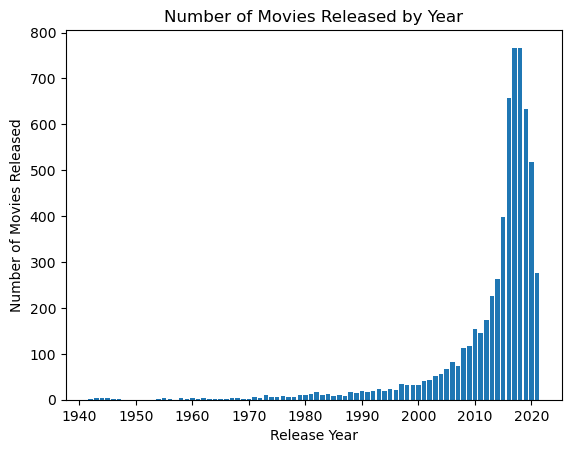

In [211]:
plt.bar(movie_released_year_df['Release Year'], movie_released_year_df['Count'])
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released by Year')
#plt.grid(True)
plt.show()


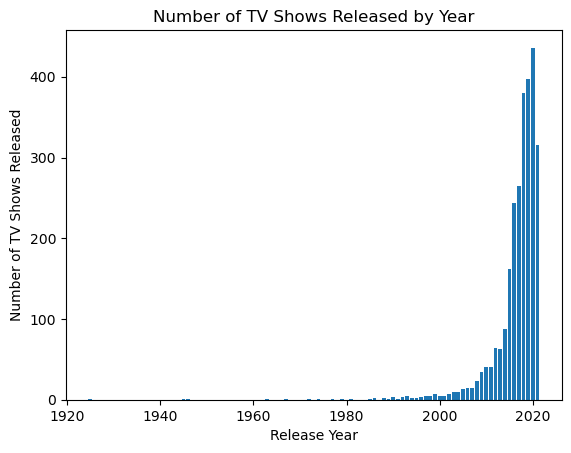

In [212]:
# Create a line plot
plt.bar(shows_released_year_df['Release Year'], shows_released_year_df['Count'])
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows Released')
plt.title('Number of TV Shows Released by Year')

# Display the plot
plt.show()

Answer to question 2

In [221]:
#df['count'] = 1
#date_added_year_df = df.groupby(['date_added_year']).sum().reset_index()[['date_added_year','count']]

# Group the movies by their release years and count the number of movies in each year
content_added_year_df = df.groupby('Year Added').size().reset_index(name='Count')


# Sort the DataFrames by Release Year in ascending order
content_added_year_df.sort_values('Year Added', inplace=True)

In [222]:
content_added_year_df

,Year Added,Count
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,24
7,2015.0,82
8,2016.0,429
9,2017.0,1188


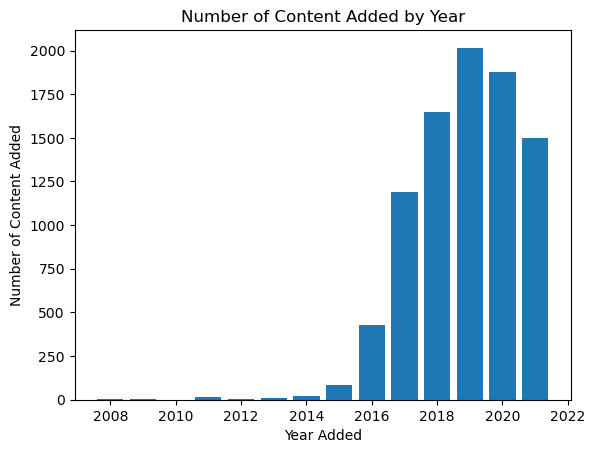

In [224]:
# Create a bar plot
plt.bar(content_added_year_df['Year Added'], content_added_year_df['Count'])
plt.xlabel('Year Added')
plt.ylabel('Number of Content Added')
plt.title('Number of Content Added by Year')

# Display the plot
plt.show()

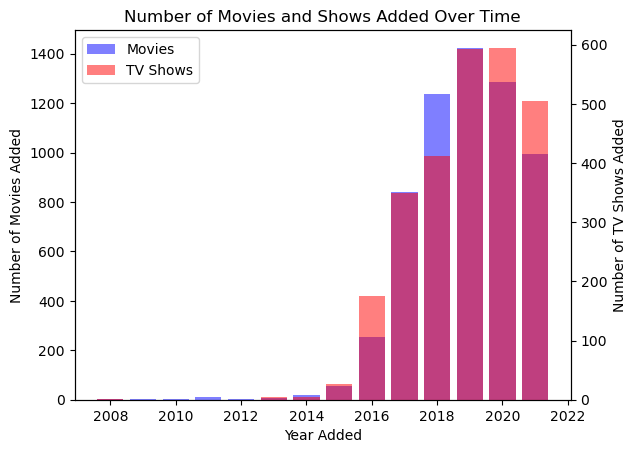

In [226]:
# Group the movies by their release years and count the number of movies in each year
movie_added_year_df = df[df['Type'] == 'Movie'].groupby('Year Added').size().reset_index(name='Count')
shows_added_year_df = df[df['Type'] == 'TV Show'].groupby('Year Added').size().reset_index(name='Count')

# Sort the DataFrames by Release Year in ascending order
movie_added_year_df.sort_values('Year Added', inplace=True)
shows_added_year_df.sort_values('Year Added', inplace=True)

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the bar plots for movies and shows
ax1.bar(movie_added_year_df['Year Added'], movie_added_year_df['Count'], color='b', alpha=0.5, label='Movies')
ax1.set_xlabel('Year Added')
ax1.set_ylabel('Number of Movies Added')
ax1.set_title('Number of Movies and Shows Added Over Time')

ax2 = ax1.twinx()
ax2.bar(shows_added_year_df['Year Added'], shows_added_year_df['Count'], color='r', alpha=0.5, label='TV Shows')
ax2.set_ylabel('Number of TV Shows Added')

# Customize the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

# Display the plot
plt.show()

### Answer to Question 2: Netflix added the most content in 2019 with 1424 movies and 592 TV Shows totaling 2016

In [227]:
df.head()

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed In,Description,Month Added,Year Added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",September,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",September,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",September,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus...",September,2021.0


In [229]:
content_added_month_df = df.groupby('Month Added').size().reset_index(name='Count')

In [231]:
content_added_month_df.sort_values(['Count'], ascending=False)

,Month Added,Count
5,July,827
2,December,813
11,September,770
0,April,764
10,October,760
1,August,755
7,March,742
4,January,738
6,June,728
9,November,705


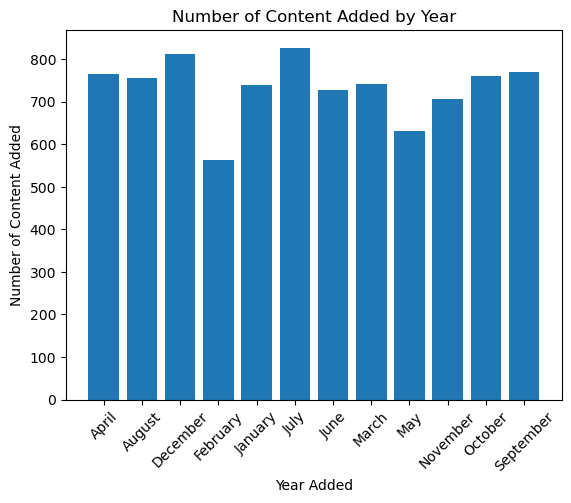

In [237]:
# Create a line plot
plt.bar(content_added_month_df['Month Added'], content_added_month_df['Count'])
plt.xlabel('Year Added')
plt.ylabel('Number of Content Added')
plt.title('Number of Content Added by Year')
plt.xticks(rotation=45)
# Display the plot
plt.show()

### July is the month most content are added

In [242]:
content_origin_df = df.groupby('Country').size().reset_index(name='Count')
content_origin_df.sort_values(['Count'], ascending=False).head(10)

,Country,Count
603,United States,2818
251,India,972
506,United Kingdom,419
319,Japan,245
435,South Korea,199
58,Canada,181
444,Spain,145
162,France,124
342,Mexico,110
150,Egypt,106


In [ ]:
movie_df = df[df['type']== 'Movie']


In [ ]:
movie_df['Title Length'] = [len(title) for title in movie_df['title']]
movie_df.head()

/var/folders/jm/qm0dt33936z09_t_fdt2qw940000gn/T/ipykernel_22309/2118992627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Title Length'] = [len(title) for title in movie_df['title']]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month,Title Length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1,September,20
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021.0,1,September,32
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0,1,September,7
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021.0,1,September,12
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021.0,1,September,12


In [ ]:
top_title_lengths = movie_df.sort_values(['Title Length'], ascending=False)
top_title_lengths.iloc[0]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

### Question 5: Which actor/actress shows up most frequently in the netflix database

In [ ]:
title_and_cast_df = df[['title', 'cast']]
title_and_cast_df = title_and_cast_df.dropna()
title_and_cast_df.head()

,title,cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera"
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar"
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gis..."
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr"


In [ ]:
cast_names_counter = {} 

for index, row in title_and_cast_df.iterrows():
    movie_cast = row['cast']
    movie_cast_split = movie_cast.split(',')
    movie_cast_stripped = [name.strip() for name in movie_cast_split]
    #print(movie_cast_stripped)
    #print()
    for name in movie_cast_stripped:
        cast_names_counter[name] = cast_names_counter.get(name, 0) + 1
  
dict(sorted(cast_names_counter.items(), key=lambda item: item[1], reverse=True))

{'Anupam Kher': 43,
 'Shah Rukh Khan': 35,
 'Julie Tejwani': 33,
 'Naseeruddin Shah': 32,
 'Takahiro Sakurai': 32,
 'Rupa Bhimani': 31,
 'Akshay Kumar': 30,
 'Om Puri': 30,
 'Yuki Kaji': 29,
 'Amitabh Bachchan': 28,
 'Paresh Rawal': 28,
 'Boman Irani': 27,
 'Rajesh Kava': 26,
 'Vincent Tong': 26,
 'Andrea Libman': 25,
 'Kareena Kapoor': 25,
 'Samuel L. Jackson': 24,
 'John Cleese': 24,
 'Jigna Bhardwaj': 23,
 'Fred Tatasciore': 23,
 'Tara Strong': 23,
 'Daisuke Ono': 22,
 'Junichi Suwabe': 21,
 'Ajay Devgn': 21,
 'Ashleigh Ball': 21,
 'Kay Kay Menon': 21,
 'Nicolas Cage': 21,
 'Nawazuddin Siddiqui': 21,
 'Adam Sandler': 20,
 'David Attenborough': 20,
 'Salman Khan': 20,
 'David Spade': 19,
 'Yuichi Nakamura': 19,
 'Erin Fitzgerald': 19,
 'Mamoru Miyano': 19,
 'Morgan Freeman': 19,
 'James Franco': 19,
 'Seth Rogen': 19,
 'Ai Kayano': 19,
 'Fred Armisen': 19,
 'Gulshan Grover': 19,
 'Vatsal Dubey': 18,
 'Rajesh Sharma': 18,
 'Fortune Feimster': 18,
 'Diana Kaarina': 18,
 'Yashpal Sharma